# Sanjid Alam CS381/780 Data Analytics Final Project  

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on data provided by LendingClub 

https://www.lendingclub.com
    
### The dataset was provided by Kaggle and contains information on loan borrowers 
collected by LendingClub from the year 2007 to 2010. 



Listing of attributes:
    
* credit.policy: a set of guidelines and criteria that decides on credit limits, credit terms, and how to go about delinquent accounts. The borrower either meets the criteria (represented by the integer 1 in our data) or does not (represented by 0 in our data).
* purpose: purpose of the loan contracted (a.i: installment, debt consolidation)
* int.rate: interest rate on the loan.
* installment: monthly payment owed by the borrower.
* log.annual.inc: natural logarithm of self-reported income.
* dti: Debt-to-Income ratio
* fico: FICO score of loan borrowers
* days.with.cr.line: number of days with line of credit.
* revol.bal: revolving balance or the portion of credit that remains unpaid after billing cycle.
* revol.util: revolving utilization or debt-to-limit ratio, debt divided by credit limit.
* inq.last.6mths: inquiries during last 6 months. Inquiries happen when a financial institution checks your credit to make a lending decision, this usually happens when you apply for credit. There are two types of inquiries: hard inquiries or ‘hard pulls’ when you apply for mortgage, credit card… and soft inquiries or ‘soft pulls’ for credit card offers or employment. For the purpose of this project, we will consider the data to represent ‘hard pulls’.
* delinq.2yrs: number of loan delinquencies (30 days or more past due on a payment) reported during the past 2 years.
* pub.rec: number of derogatory public records of loan borrowers.
* not.fully.paid: this column shows whether a loan was not fully paid (1) or fully paid (0)

### Your task in the final project is build the best predictive model to predict what type of borrower will be more likely to default (i.e not fully paid back their loan)

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped 100



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


In [160]:
#loading data
df = pd.read_csv("lendingclub_loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

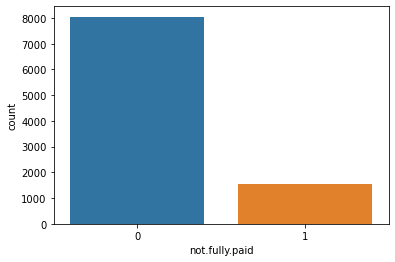

In [161]:
sns.countplot(df['not.fully.paid'])

### Good Luck !!!

Show all your work below

In [162]:
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment           True
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [163]:
#removing missing values
df = df [~np.isnan (df.installment)]
df.isnull().any()

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

<AxesSubplot:xlabel='fico', ylabel='revol.bal'>

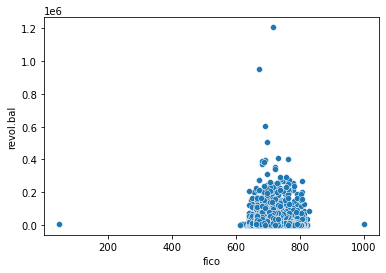

In [164]:
#found outliers in fico
sns.scatterplot(x='fico', y = 'revol.bal', data=df)

In [165]:
#removing ouliers
df = df[ df['fico'] <= 800]
df = df[ df['fico'] >= 500]
df.shape

(9433, 14)

<AxesSubplot:xlabel='fico', ylabel='revol.bal'>

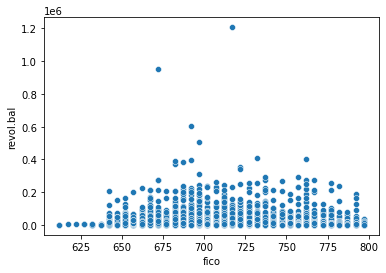

In [166]:
sns.scatterplot(x='fico', y = 'revol.bal', data=df)

In [167]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [168]:
#normalizing numeric features
numerical_features = df[['installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util']]
numerical_features.head()

,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
0,829.10,11.350407,19.48,5639.958333,28854,52.1
1,228.22,11.082143,14.29,2760.000000,33623,76.7
2,366.86,10.373491,11.63,4710.000000,3511,25.6
3,162.34,11.350407,8.10,2699.958333,33667,73.2
4,102.92,11.299732,14.97,4066.000000,4740,39.5


In [169]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(numerical_features)
normalized_df = pd.DataFrame(normalized_df, columns = ['installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util'] )
normalized_df.head()

,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
0,2.471425,0.689784,0.987805,0.453462,0.355243,0.162392
1,-0.436866,0.252012,0.229945,-0.712892,0.497209,1.018026
2,0.234159,-0.904414,-0.158476,0.076838,-0.399183,-0.759328
3,-0.755728,0.689784,-0.673937,-0.737208,0.498519,0.896289
4,-1.043324,0.607090,0.329241,-0.183975,-0.362598,-0.275860


In [170]:
normalized_df.describe()

,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
count,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03,9.433000e+03
mean,-2.619905e-16,2.389481e-15,1.806157e-16,-1.929885e-16,-2.391458e-16,-1.015419e-16
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-1.465619e+00,-5.516059e+00,-1.856724e+00,-1.758187e+00,-5.037010e-01,-1.649744e+00
25%,-7.489038e-01,-6.068891e-01,-7.834544e-01,-7.007421e-01,-4.057027e-01,-8.254133e-01
50%,-2.417632e-01,-1.883400e-02,7.990321e-03,-1.661554e-01,-2.437912e-01,-1.499562e-02
75%,5.442129e-01,5.908525e-01,7.804521e-01,4.777616e-01,4.305921e-02,8.302039e-01
max,3.008864e+00,5.875779e+00,2.518126e+00,5.313341e+00,3.543771e+01,2.489299e+00


In [171]:
minMaxScaler = MinMaxScaler()
minMax_df = minMaxScaler.fit_transform(numerical_features)
minMax_df = pd.DataFrame(minMax_df, columns =  ['installment','log.annual.inc','dti','days.with.cr.line','revol.bal','revol.util'])
minMax_df.head()

,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
0,0.879888,0.544762,0.650200,0.312754,0.023898,0.437815
1,0.229916,0.506334,0.476969,0.147818,0.027848,0.644538
2,0.379883,0.404820,0.388184,0.259495,0.002908,0.215126
3,0.158653,0.544762,0.270360,0.144379,0.027885,0.615126
4,0.094378,0.537503,0.499666,0.222613,0.003926,0.331933


In [172]:
#creating a new data frame with features that do not need to be normalized
df0 = df[['credit.policy','purpose','fico','int.rate','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']]
df0.head()

,credit.policy,purpose,fico,int.rate,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,737,0.1189,0,0,0,0
1,1,credit_card,707,0.1071,0,0,0,0
2,1,debt_consolidation,682,0.1357,1,0,0,0
3,1,debt_consolidation,712,0.1008,1,0,0,0
4,1,credit_card,667,0.1426,0,1,0,0


In [173]:
#concatinating the normalized data framed with df0
df1 = pd.concat([df0,minMax_df], axis=1)
df1.head()

,credit.policy,purpose,fico,int.rate,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util
0,1.0,debt_consolidation,737.0,0.1189,0.0,0.0,0.0,0.0,0.879888,0.544762,0.650200,0.312754,0.023898,0.437815
1,1.0,credit_card,707.0,0.1071,0.0,0.0,0.0,0.0,0.229916,0.506334,0.476969,0.147818,0.027848,0.644538
2,1.0,debt_consolidation,682.0,0.1357,1.0,0.0,0.0,0.0,0.379883,0.404820,0.388184,0.259495,0.002908,0.215126
3,1.0,debt_consolidation,712.0,0.1008,1.0,0.0,0.0,0.0,0.158653,0.544762,0.270360,0.144379,0.027885,0.615126
4,1.0,credit_card,667.0,0.1426,0.0,1.0,0.0,0.0,0.094378,0.537503,0.499666,0.222613,0.003926,0.331933


In [174]:
#creating dummy variables for categorical feature 
purpose = pd.get_dummies(df['purpose'],drop_first=True)
purpose
#,'home_improvement','major_purchase','small_business'

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9576,0,0,0,0,0,0
9577,0,0,0,0,0,0
9578,0,1,0,0,0,0
9579,0,0,0,1,0,0


In [175]:
#dropping features that are not needed
purpose = purpose.drop('educational', axis=1)
purpose = purpose.drop('home_improvement', axis=1)
purpose = purpose.drop('major_purchase', axis=1)
purpose = purpose.drop('small_business', axis=1)

In [176]:
purpose.head()

,credit_card,debt_consolidation
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [177]:
df2 = df1[['credit.policy','int.rate', 'log.annual.inc', 'dti', 'fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid']]

In [178]:
df2.head()

,credit.policy,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1.0,0.1189,0.544762,0.650200,737.0,0.312754,0.023898,0.437815,0.0,0.0,0.0,0.0
1,1.0,0.1071,0.506334,0.476969,707.0,0.147818,0.027848,0.644538,0.0,0.0,0.0,0.0
2,1.0,0.1357,0.404820,0.388184,682.0,0.259495,0.002908,0.215126,1.0,0.0,0.0,0.0
3,1.0,0.1008,0.544762,0.270360,712.0,0.144379,0.027885,0.615126,1.0,0.0,0.0,0.0
4,1.0,0.1426,0.537503,0.499666,667.0,0.222613,0.003926,0.331933,0.0,1.0,0.0,0.0


In [179]:
#conactinating converted categorical feature dataframe with the most updated dataframe
df3 = pd.concat([df2,purpose], axis=1)
df3.head()

,credit.policy,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation
0,1.0,0.1189,0.544762,0.650200,737.0,0.312754,0.023898,0.437815,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.1071,0.506334,0.476969,707.0,0.147818,0.027848,0.644538,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.1357,0.404820,0.388184,682.0,0.259495,0.002908,0.215126,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.1008,0.544762,0.270360,712.0,0.144379,0.027885,0.615126,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.1426,0.537503,0.499666,667.0,0.222613,0.003926,0.331933,0.0,1.0,0.0,0.0,1.0,0.0


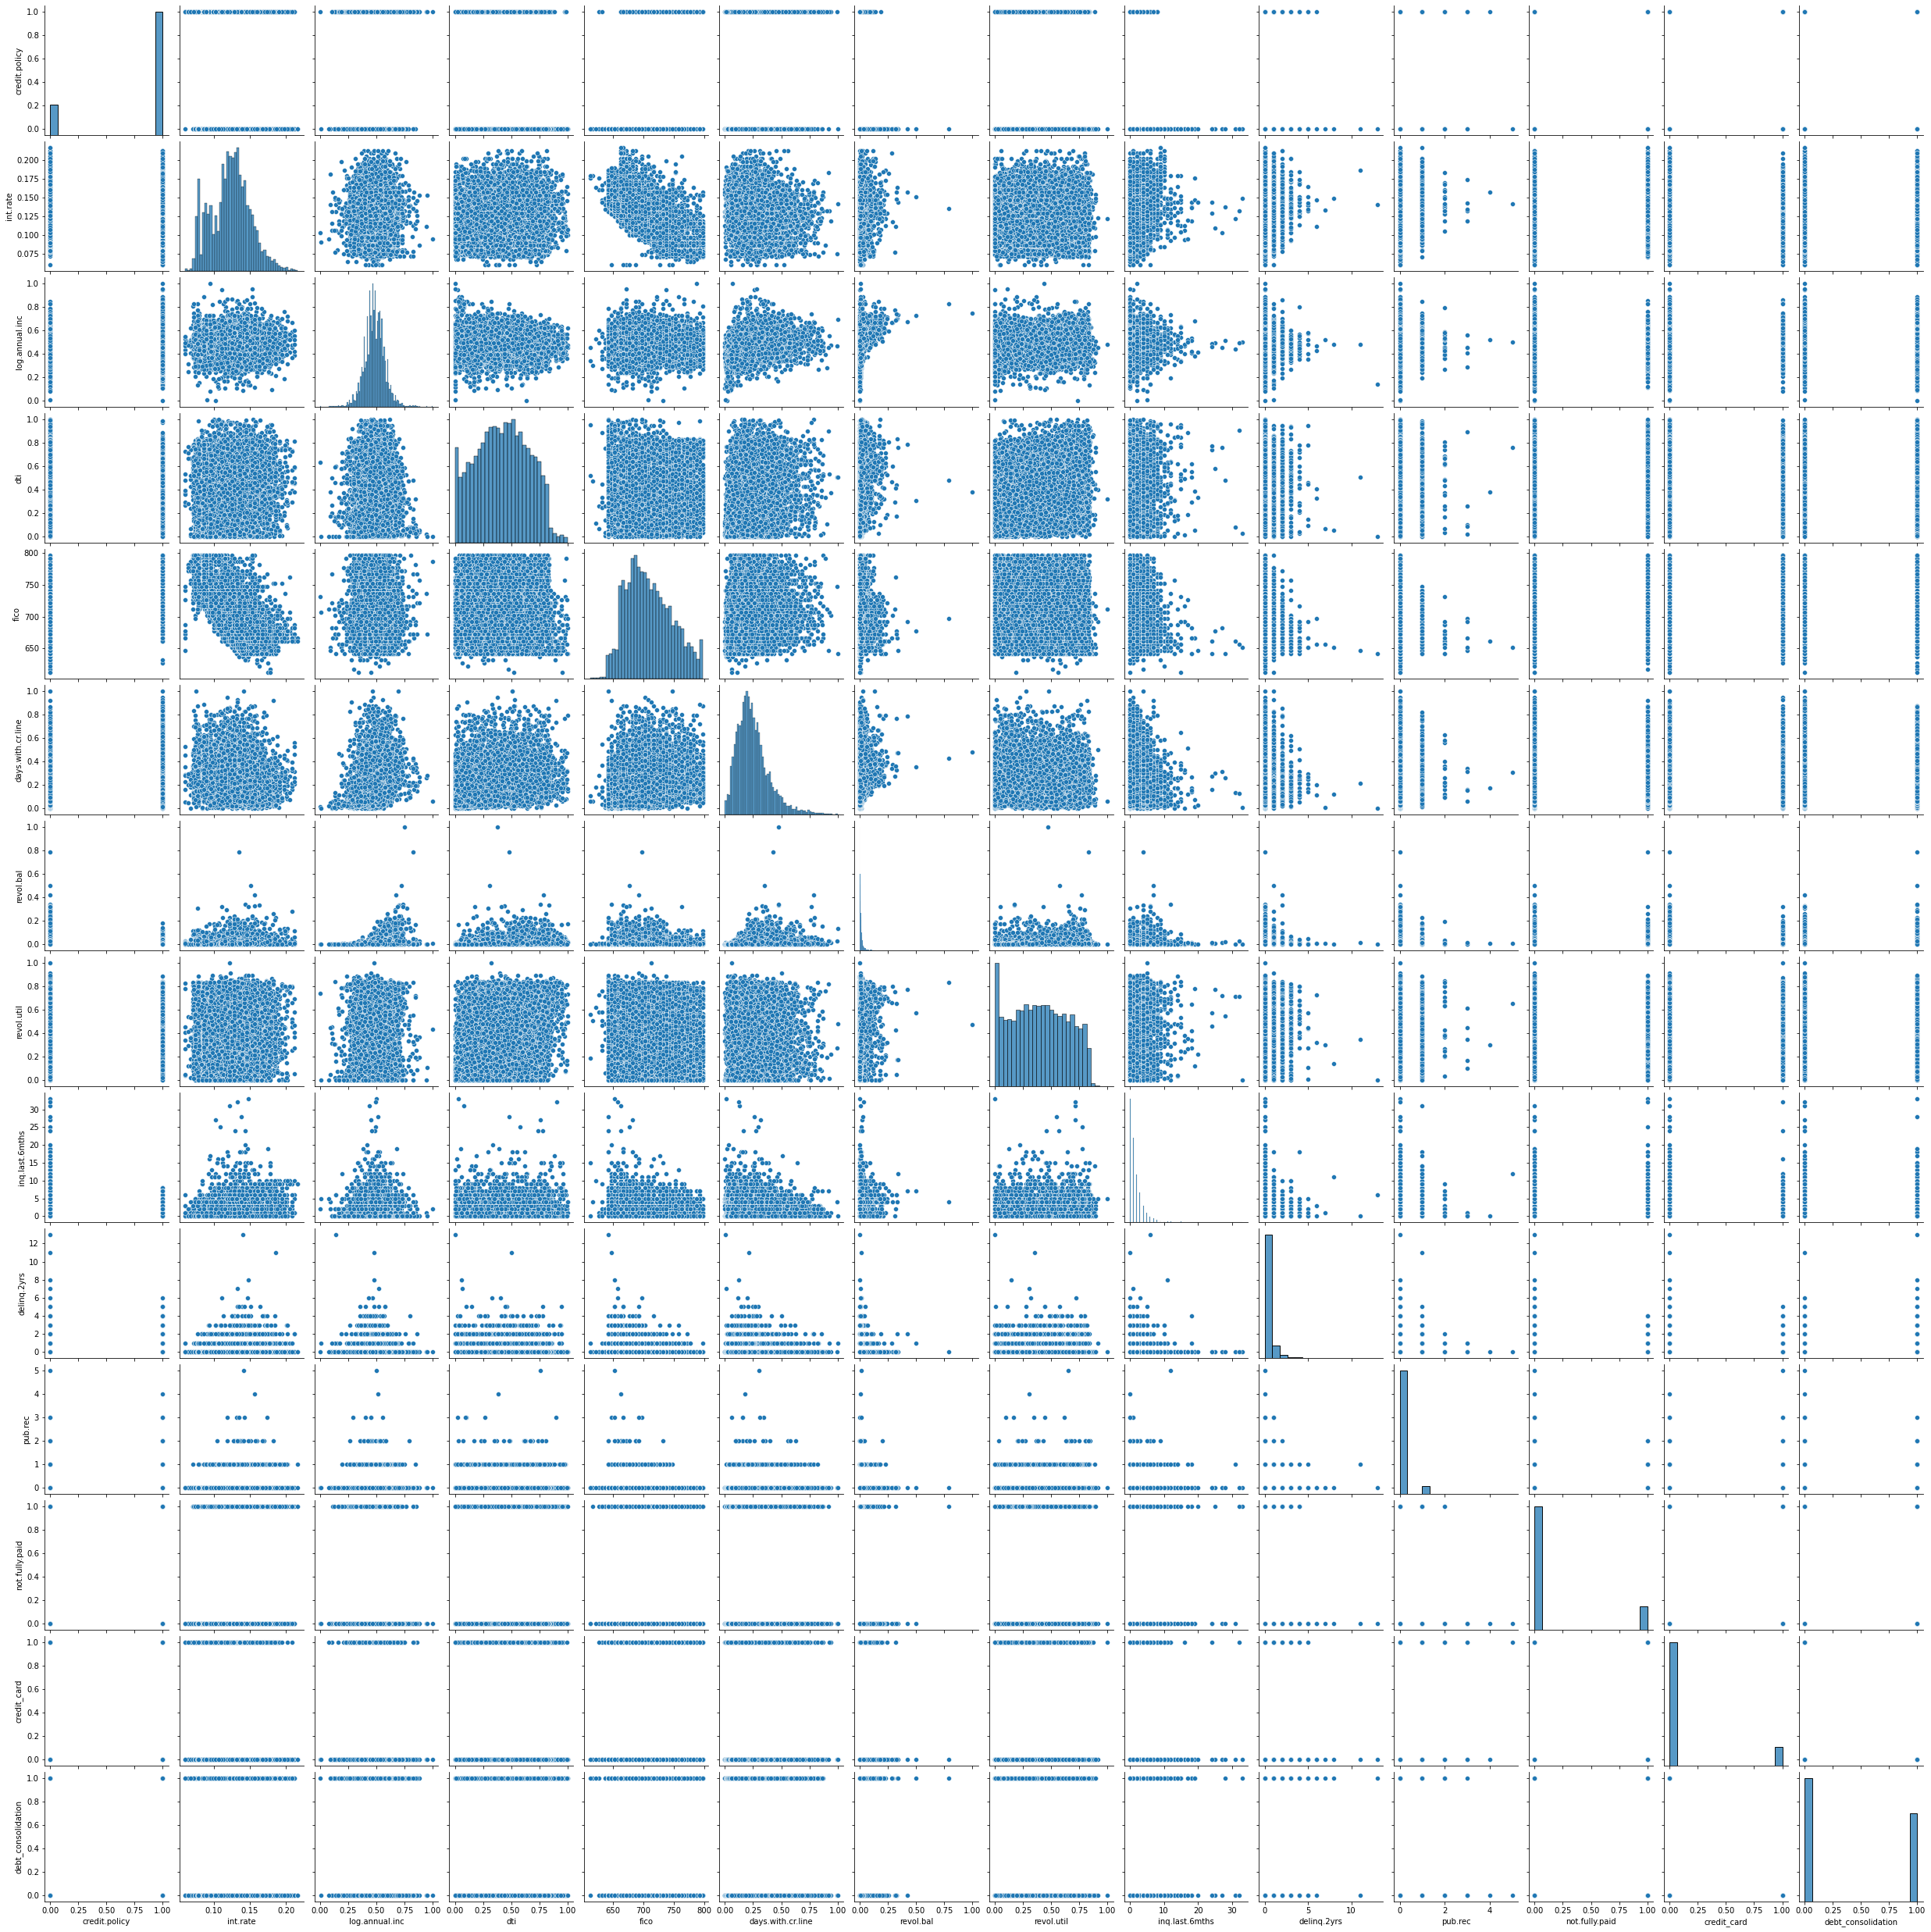

In [180]:
#pairplot of the updated dataframe
sns.pairplot(data=df3)

In [181]:
#correlation matrix
df3.corr()

,credit.policy,int.rate,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation
credit.policy,1.000000,-0.293163,0.013448,-0.101285,0.354318,0.072832,-0.199817,-0.098709,-0.535936,-0.075100,-0.053239,-0.157790,0.004028,0.023832
int.rate,-0.293163,1.000000,-0.001554,0.037949,-0.716905,-0.029350,0.070323,0.032854,0.198227,0.153099,0.095414,0.156363,-0.046282,0.117516
log.annual.inc,0.013448,-0.001554,1.000000,-0.046455,0.023940,0.334964,0.374439,0.066186,-0.004667,-0.017625,-0.006694,-0.021366,0.009355,0.002839
dti,-0.101285,0.037949,-0.046455,1.000000,-0.044301,0.078637,0.189834,0.323583,0.050187,-0.011655,0.007587,0.020797,0.007692,0.015355
fico,0.354318,-0.716905,0.023940,-0.044301,1.000000,0.057805,-0.052987,-0.047483,-0.179402,-0.215796,-0.145844,-0.147921,-0.003860,-0.142878
days.with.cr.line,0.072832,-0.029350,0.334964,0.078637,0.057805,1.000000,0.234577,-0.000714,-0.041819,-0.029075,-0.012797,-0.015495,-0.002144,0.012806
revol.bal,-0.199817,0.070323,0.374439,0.189834,-0.052987,0.234577,1.000000,0.208760,0.113649,-0.002282,0.004230,0.022636,-0.007766,0.018775
revol.util,-0.098709,0.032854,0.066186,0.323583,-0.047483,-0.000714,0.208760,1.000000,0.055364,0.000028,0.005136,0.031747,-0.001992,0.003581
inq.last.6mths,-0.535936,0.198227,-0.004667,0.050187,-0.179402,-0.041819,0.113649,0.055364,1.000000,0.019507,0.071503,0.148668,-0.035025,-0.047349
delinq.2yrs,-0.075100,0.153099,-0.017625,-0.011655,-0.215796,-0.029075,-0.002282,0.000028,0.019507,1.000000,0.008101,0.007774,-0.009905,-0.003035


so we see that int.rate , fico,credit.policy and inq.last.6mths have highest correlation with respect to not.fully.paid

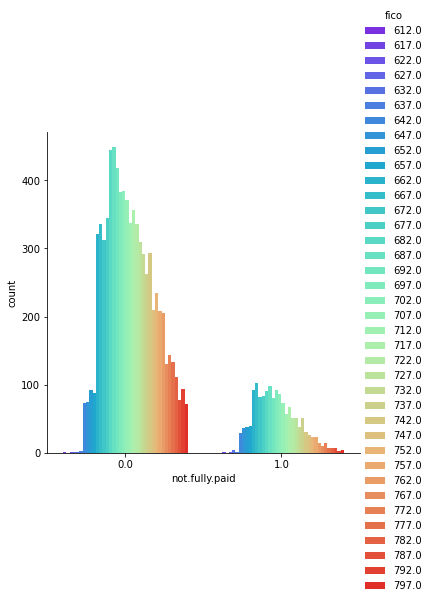

In [182]:
#plotting fico's realtion with not.fully.paid
sns.factorplot('not.fully.paid', kind='count', hue='fico', data=df3,palette='rainbow')

so we see that the not fully paid graph is positively skewed with respect to fico score, in our case it means borrowers lower fico score not fully paid of the loan

<AxesSubplot:ylabel='int.rate'>

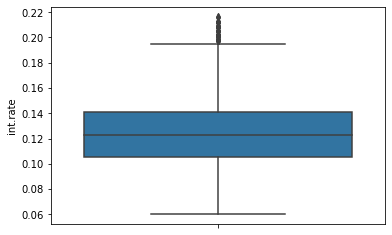

In [183]:
#we have some outliers in int.rate
var='int.rate'
sns.boxplot(y=df3[var])

In [184]:
#removing outliers in int.rate
df3 = df3[ df3['int.rate'] <= .18]
df3.shape

(9230, 14)

<AxesSubplot:ylabel='int.rate'>

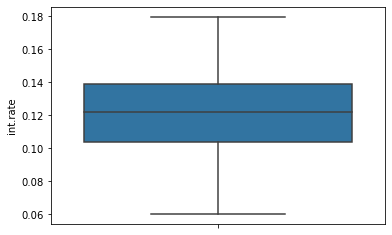

In [185]:
sns.boxplot(y=df3[var])

In [186]:
#taking the features with highest correlaytions with respect to target variable to build a model
loan = df3[['fico','credit.policy','int.rate','inq.last.6mths','not.fully.paid']]

In [187]:
#separating data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(loan.drop('not.fully.paid',axis=1), 
                                                    loan['not.fully.paid'], test_size=0.20, 
                                                    random_state=101)

In [188]:
#building a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [189]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      1562
         1.0       0.44      0.01      0.03       284

    accuracy                           0.85      1846
   macro avg       0.65      0.51      0.47      1846
weighted avg       0.79      0.85      0.78      1846

0.8456121343445288


so the models performance is about 84% but the f1 score is 3%

In [190]:
from sklearn import metrics

In [191]:
Xarray = loan[['credit.policy','fico']].values
Yarray = loan['not.fully.paid'].values
X = Xarray.reshape(-1, 2)
Y = Yarray.reshape(-1, 1)

In [192]:
#doing a 10 fold cross validation test on the model
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,-0.179553
1,1,-0.197147
2,2,-0.196371
3,3,-0.187902
4,4,-0.182575
5,5,-0.168354
6,6,-0.187138
7,7,-0.186375
8,8,-0.197147
9,9,-0.197147


In [193]:
print(rdf['Rsquare'].mean())

-0.18797085863326396


since the r squared are close to mean the model passes the cross validation test

In [194]:
loan = df3[['credit.policy','fico','int.rate','inq.last.6mths','not.fully.paid']]

In [195]:
#building descitiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(loan.drop('not.fully.paid',axis=1), loan['not.fully.paid'], test_size=0.20, random_state=101)
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [196]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
print(accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1562
         1.0       0.23      0.19      0.20       284

    accuracy                           0.78      1846
   macro avg       0.54      0.54      0.54      1846
weighted avg       0.76      0.78      0.77      1846

0.7768147345612134


so we see that the model performcae is 77% which is worse than logistic regression but it has a f1 score of 19%

In [197]:
Xarray = loan[['credit.policy','fico']].values
Yarray = loan['not.fully.paid'].values
X = Xarray.reshape(-1, 2)
Y = Yarray.reshape(-1, 1)

In [198]:
#doing a 10 fold cross validation test on the model
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,-0.190069
1,1,-0.148323
2,2,-0.180307
3,3,-0.183594
4,4,-0.181818
5,5,-0.157367
6,6,-0.184610
7,7,-0.188505
8,8,-0.182921
9,9,-0.199533


In [199]:
print(rdf['Rsquare'].mean())

-0.17970459565200714


since the r squared are close to mean the model passes the cross validation test

in conclusion the desiciontreeclassiefier is better than the logisticregression in terms of f1 score.